### №1 Section for importing libraries and reading data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

colors = ['b', 'g', 'r']
markers = ['s', '*', 'o']
work_dir_path = os.path.join(os.getcwd(), '..', 'bin_data')
spectra_path = os.path.join(work_dir_path, 'data.npy')
labels_path = os.path.join(work_dir_path, 'labels.npy')
spectra = np.load(spectra_path)
labels = np.load(labels_path)
x_axis_path = os.path.join(work_dir_path, 'x_axis.npy')
x_axis = np.load(x_axis_path)

### №2 Section for visualizing input data

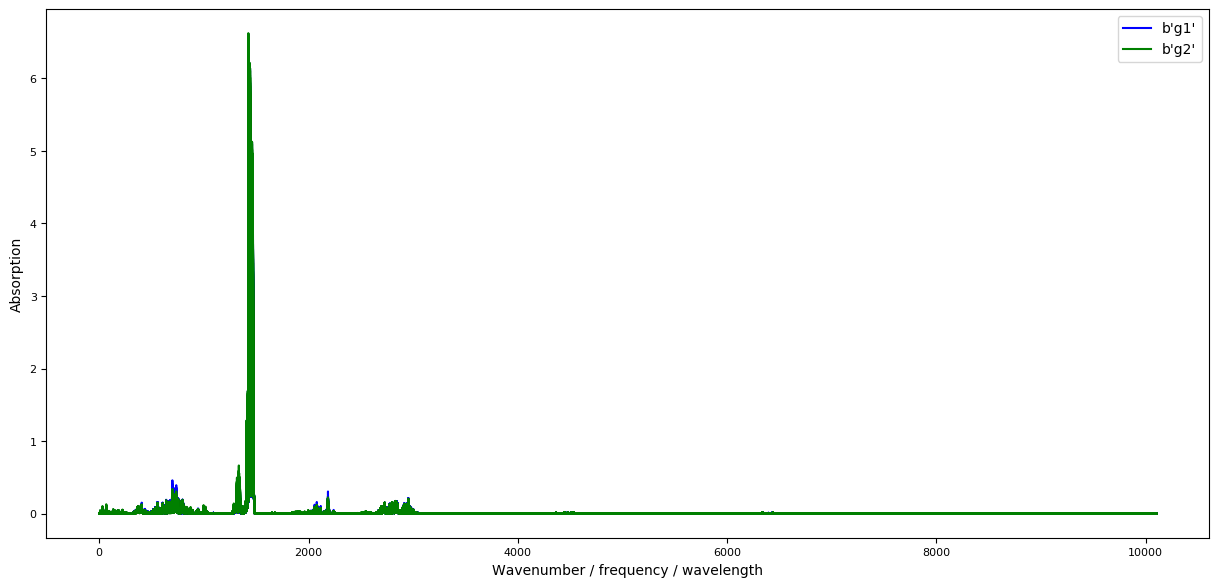

In [2]:
def plot_spectra(spectra, labels):
    unique_labels = np.unique(labels)

    fig = plt.figure(figsize=(15, 7), dpi=100)
    plt.ylabel('Absorption', fontsize=10)
    plt.xlabel('Wavenumber / frequency / wavelength', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    c = 1
    for label in unique_labels:
        label_indices = (labels[:] == label)
        label_spectra = spectra[label_indices]
        
        for spectrum in label_spectra:
            plt.plot(x_axis, spectrum, color=colors[len(colors) % c], label=label)
        c += 1

    legend_handles, legend_labels = plt.gca().get_legend_handles_labels()
    handle_by_label = dict(zip(legend_labels, legend_handles))
    plt.legend(handle_by_label.values(), handle_by_label.keys()) 
    plt.show()

    return

plot_spectra(spectra, labels)

### №3 Section for calculating ICA

In [3]:
n_components = 5

ica = FastICA(n_components=n_components)
ica_result = ica.fit_transform(spectra)

### №4 Section for displaying ICA results as a scatter plot

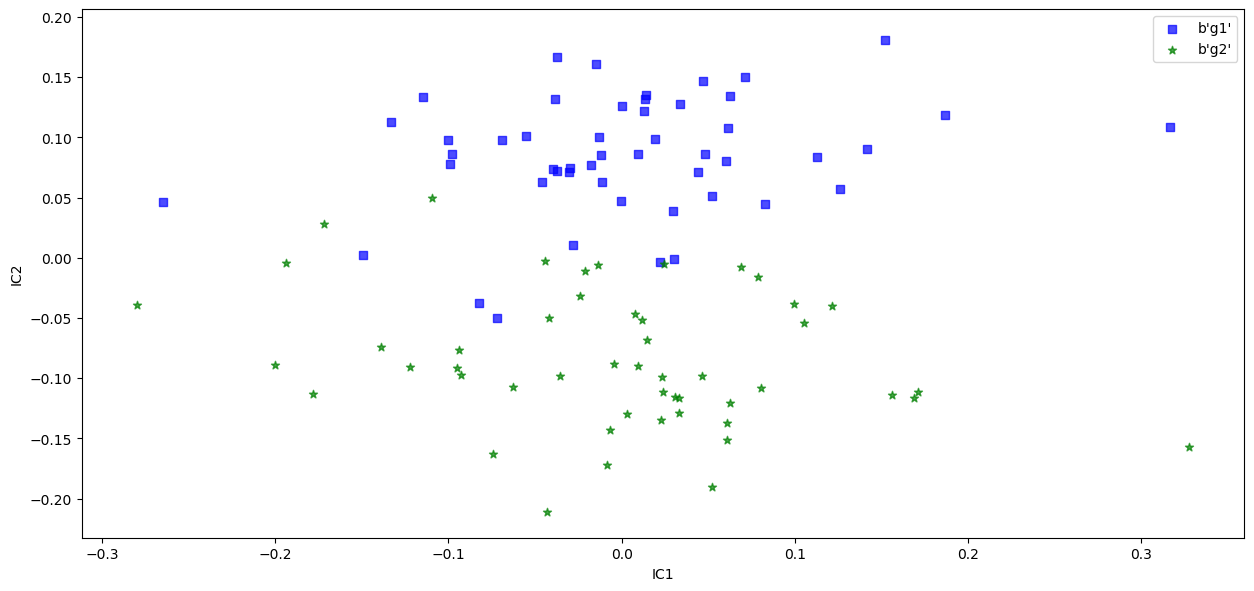

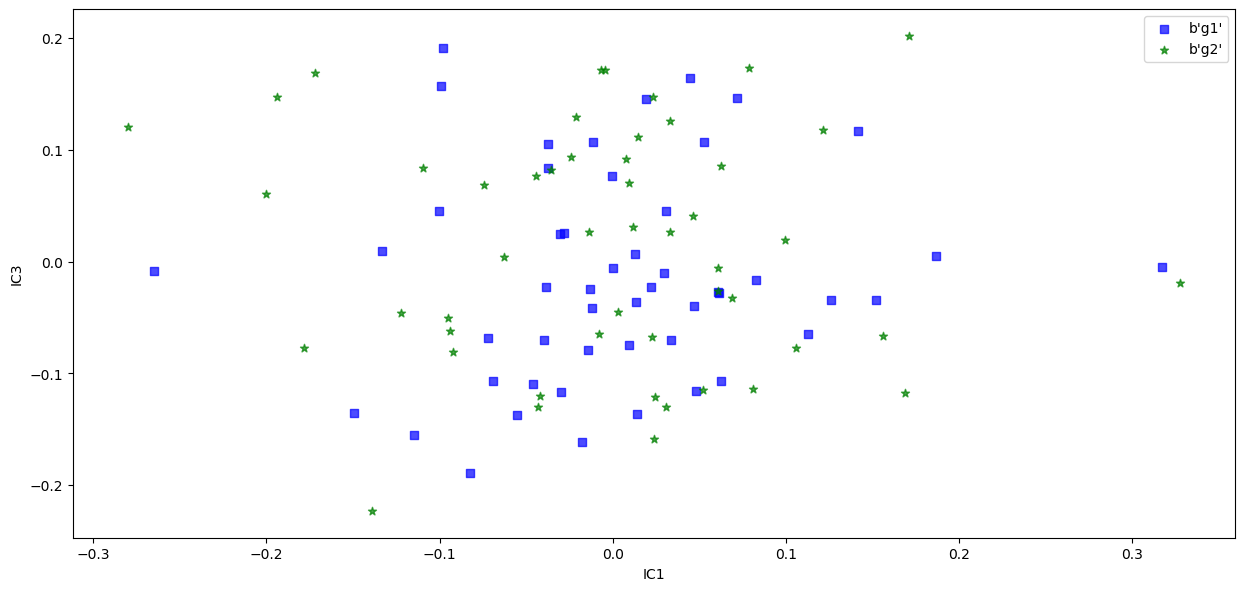

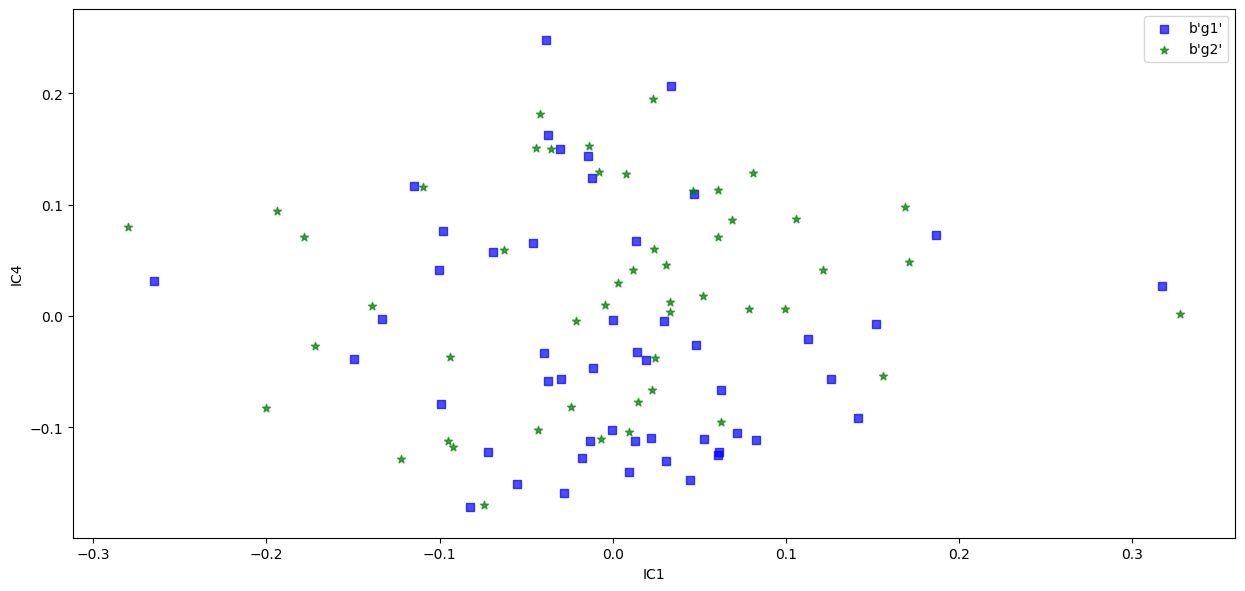

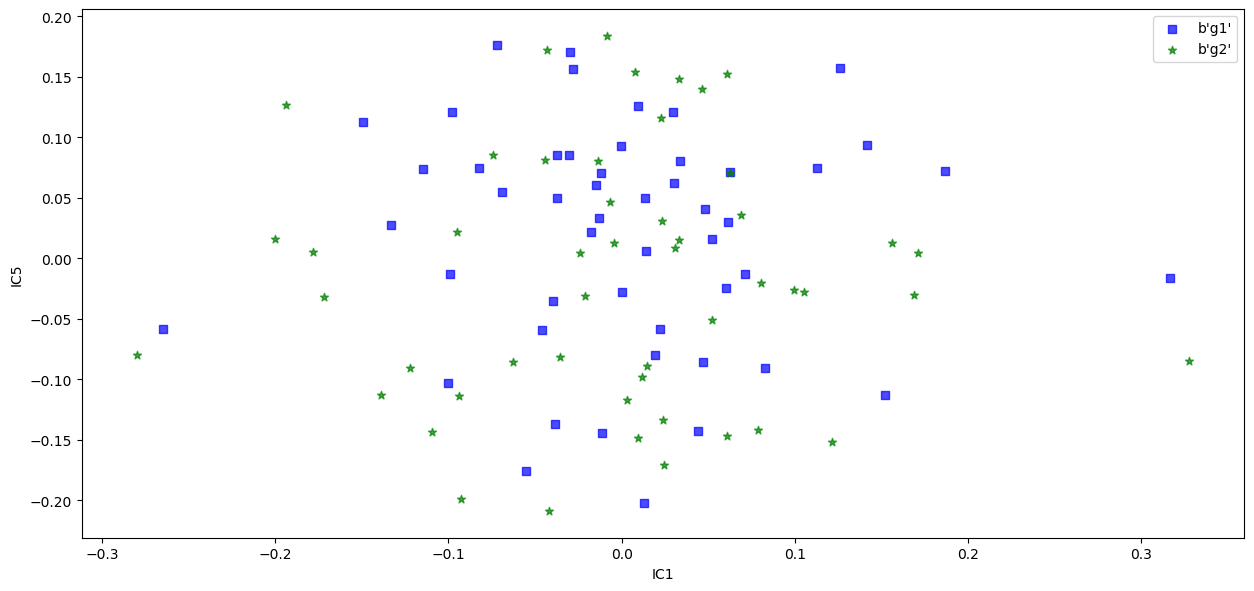

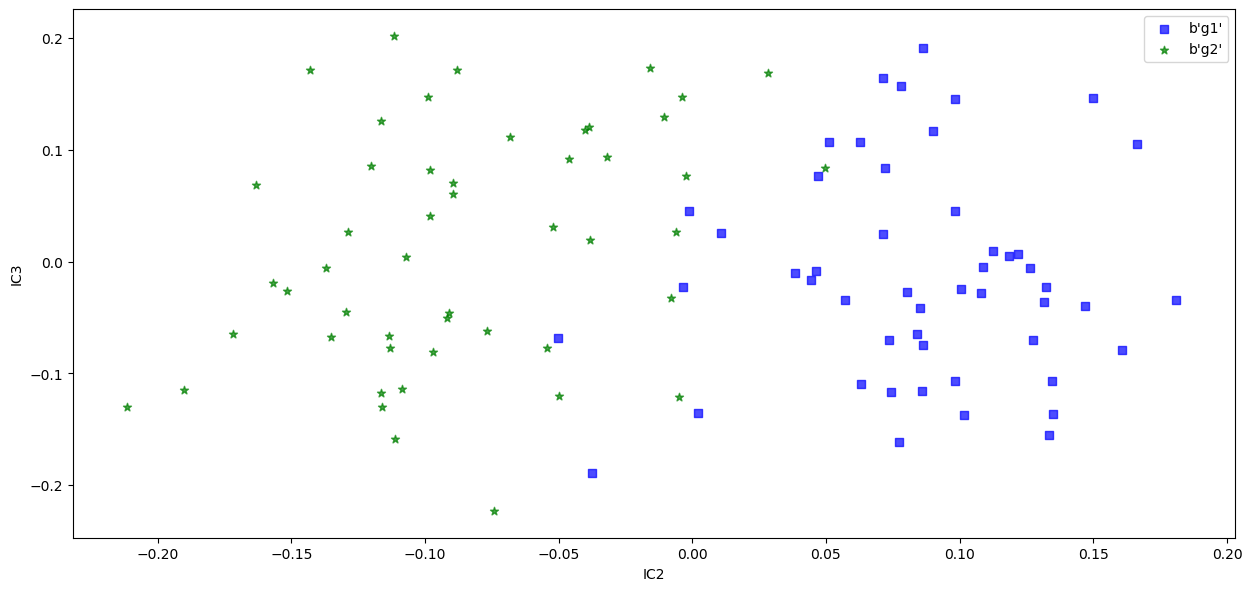

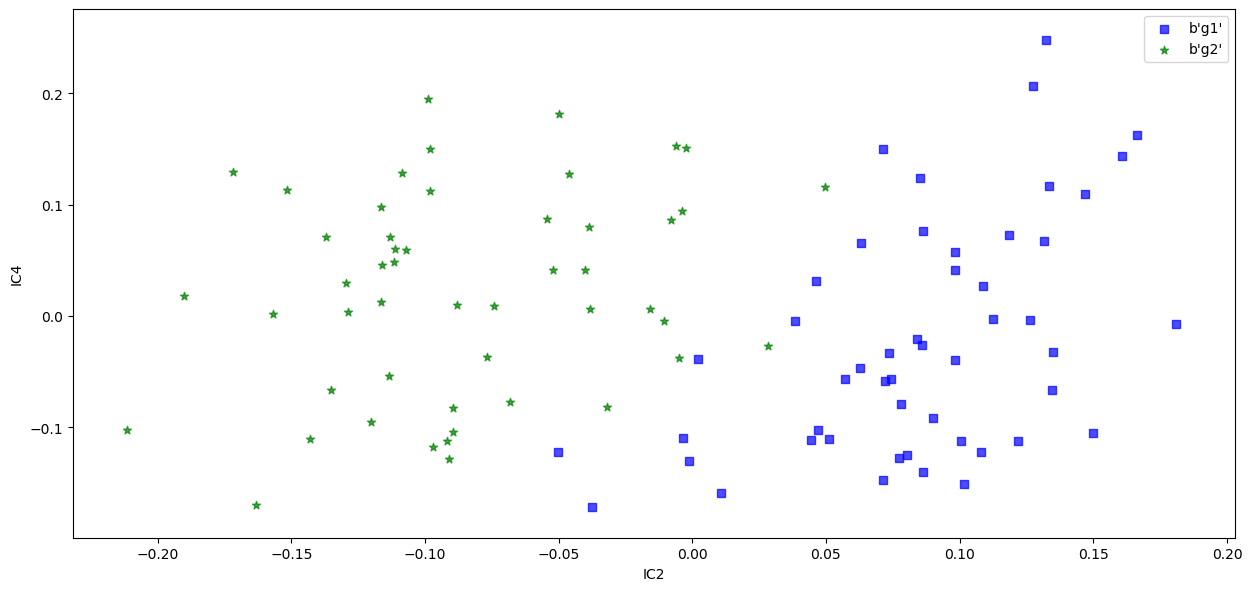

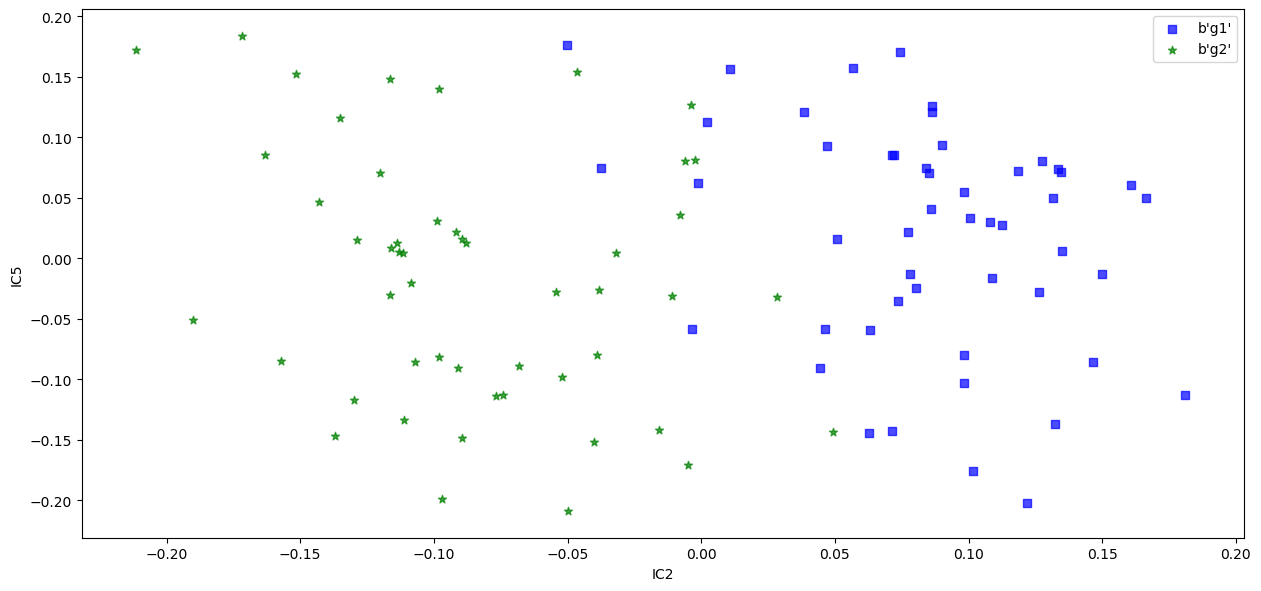

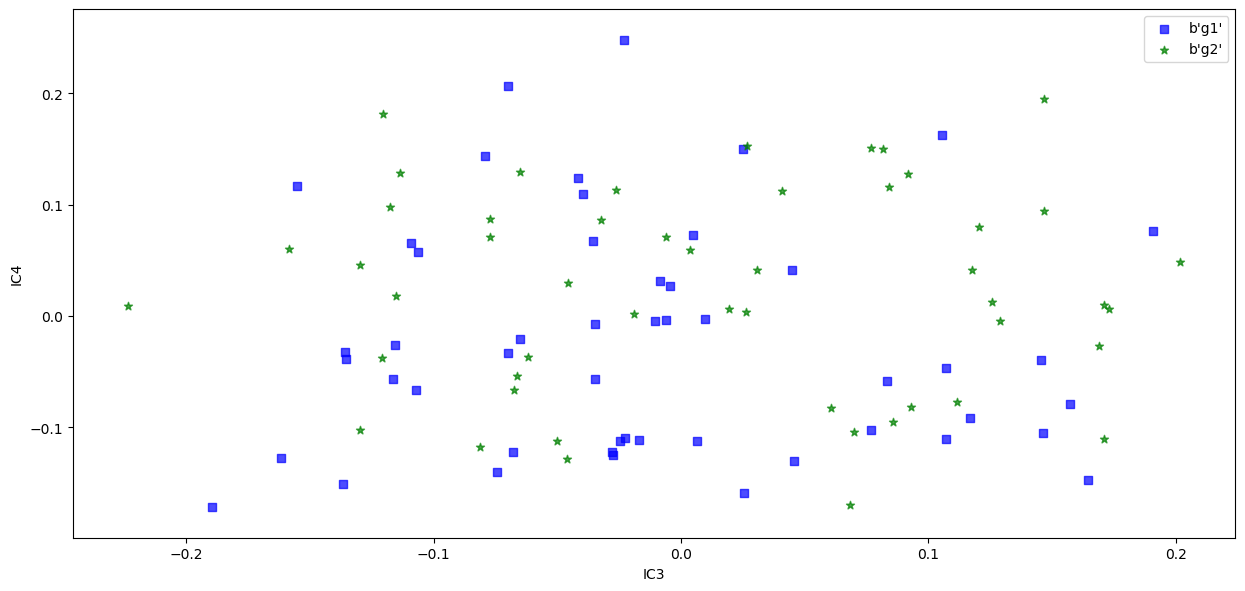

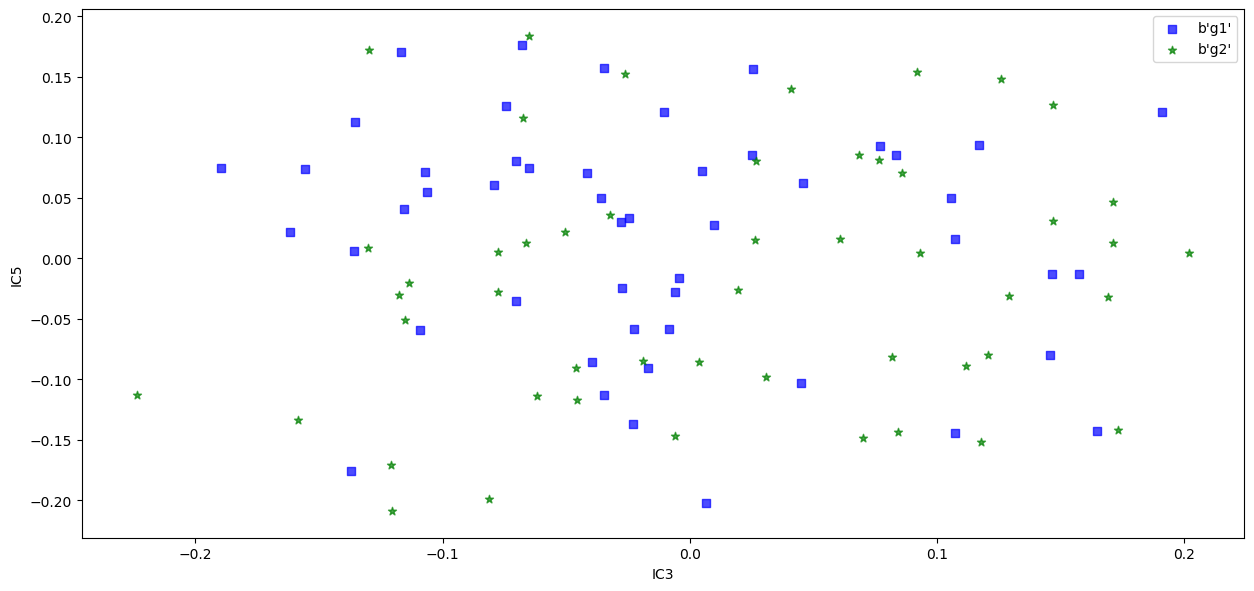

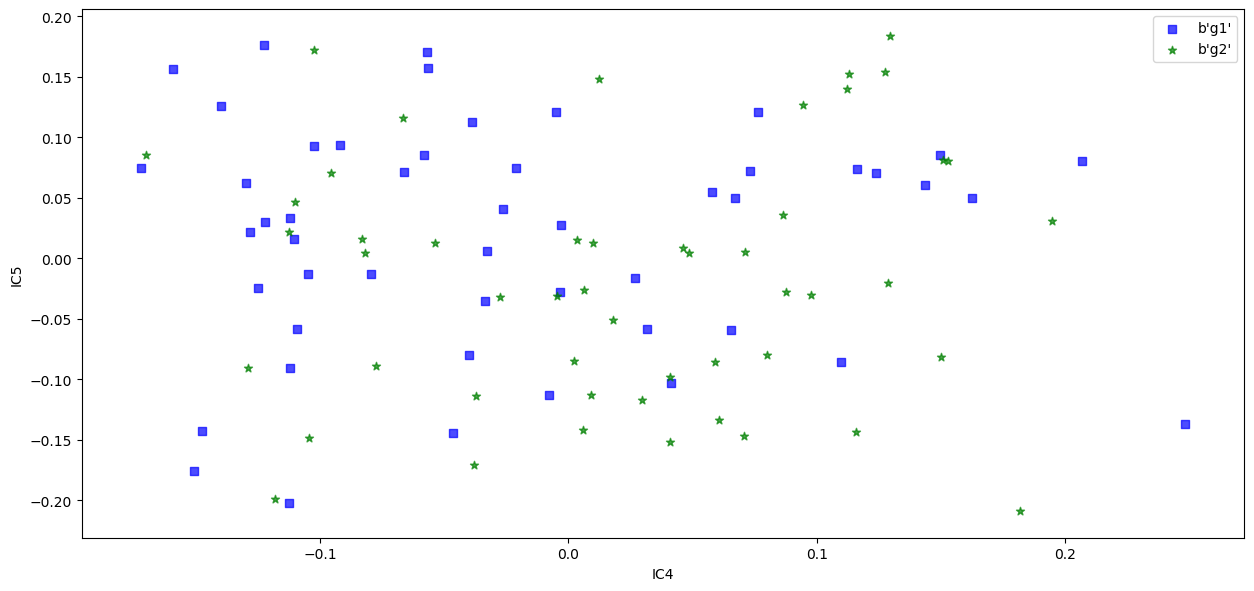

In [4]:
unique_labels = np.unique(labels)
for i in range(0, n_components):
    for j in range(i+1, n_components):
        fig = plt.figure(figsize=(15, 7), dpi=100)
        plt.grid(False)
        plt.xlabel('IC' + str(i+1))
        plt.ylabel('IC' + str(j+1))
        
        c = 1
        for label in unique_labels:
            label_indices = (labels[:] == label)
            label_ic = ica_result[label_indices]
            plt.scatter(label_ic[:, i], label_ic[:, j], alpha=0.7, c=colors[len(colors) % c], marker=markers[len(markers) % c], label=label)
            c += 1

        plt.legend()
        plt.show()